In [ ]:
!cp -r drive/MyDrive/BAMT-master .

In [ ]:
!pip install external
!pip install pomegranate
!pip install deap
!pip install gmr
!pip install pyvis
!pip install seaborn
!pip install external

In [61]:
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.formula.api import ols
import sklearn
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import minimize
import scipy.stats as stats
import pylab 
from scipy.stats import norm
from scipy.stats import kde
from scipy.stats import gamma
from scipy.stats import chi2
from scipy.stats import lognorm
import scipy
from scipy import stats
import statsmodels.nonparametric.kernel_density
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import pylab 
from sklearn.linear_model import  LassoLarsIC


from bayesian.train_bn import structure_learning, parameter_learning, parameter_learning_simple
from preprocess.discretization import get_nodes_type, discretization, code_categories, get_nodes_sign
from bayesian.save_bn import save_structure, save_params, read_structure, read_params
from bayesian.sampling import generate_synthetics
from external.libpgm.hybayesiannetwork import HyBayesianNetwork
from visualization.visualization import draw_BN
from bayesian.calculate_accuracy import calculate_acc

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 9)

Load avocado data and check it

Legend:

Date - date of the observation

AveragePrice - average price of a single avocado

Total Volume - total number of avocados sold

4046 - total number of avocados with PLU 4046 sold

4225 - total number of avocados with PLU 4225 sold

4770 - total number of avocados with PLU 4770 sold

Total Bags

Small Bags

Large Bags

XLarge Bags

type - conventional or organic

year

region

In [52]:
df = pd.read_csv("avocado.csv")
df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='date')
df.columns = ["average_price", "total_volume", "4046", "4225", "4770", "total_bags", "small_bags", "large_bags", "xlarge_bags", "type", "year", "region"]
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#Step 1

In [55]:
subsample_columns = ['large_bags', # target
                     'xlarge_bags', # target
                     '4770', # target 
                     '4046', # predictor
                     '4225', # predictor
                     'total_volume', # predictor
                     'small_bags', # predictor
                     'average_price', # predictor
                     'total_bags'] # predictor

predictors = subsample_columns[3:]
target = subsample_columns[:3]
df = df[subsample_columns]
df.head()

,large_bags,xlarge_bags,4770,4046,4225,total_volume,small_bags,average_price,total_bags
0,93.25,0.0,48.16,1036.74,54454.85,64236.62,8603.62,1.33,8696.87
1,97.49,0.0,58.33,674.28,44638.81,54876.98,9408.07,1.35,9505.56
2,103.14,0.0,130.50,794.70,109149.67,118220.22,8042.21,0.93,8145.35
3,133.76,0.0,72.58,1132.00,71976.41,78992.15,5677.40,1.08,5811.16
4,197.69,0.0,75.78,941.48,43838.39,51039.60,5986.26,1.28,6183.95


#Step 2

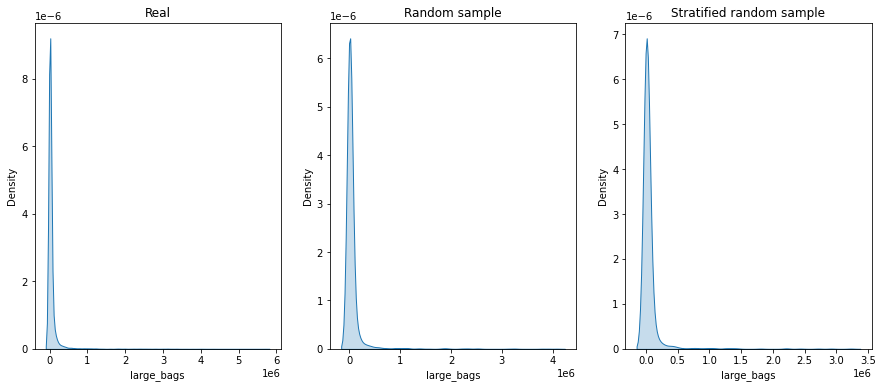

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data=df, x='large_bags', shade=True)

# Random sample
sample_data = df.sample(frac=.15)
sns.kdeplot(ax=axes[1], data=sample_data, x='large_bags', shade=True)

# Stratified random sample
sample_data = df.sample(n=1500, axis=0)
sns.kdeplot(ax=axes[2], data=sample_data, x='large_bags', shade=True)

axes[0].set_title('Real')
axes[1].set_title('Random sample')
axes[2].set_title('Stratified random sample')
plt.show()

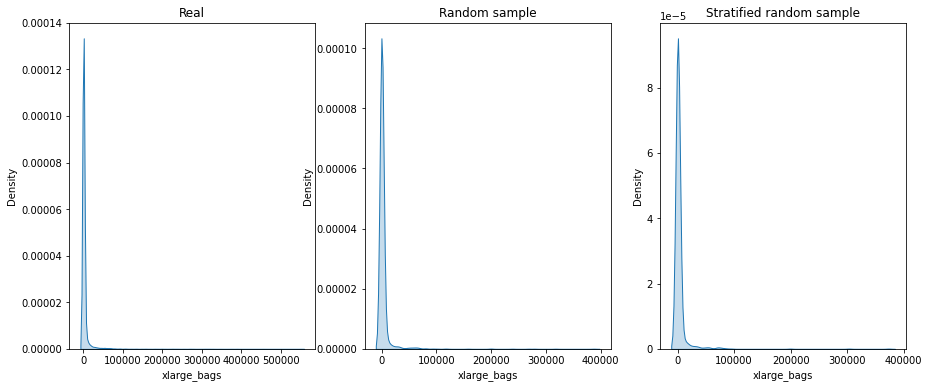

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data=df, x='xlarge_bags', shade=True)

# Random sample
sample_data = df.sample(frac=.15)
sns.kdeplot(ax=axes[1], data=sample_data, x='xlarge_bags', shade=True)

# Stratified random sample
sample_data = df.sample(n=1500, axis=0)
sns.kdeplot(ax=axes[2], data=sample_data, x='xlarge_bags', shade=True)

axes[0].set_title('Real')
axes[1].set_title('Random sample')
axes[2].set_title('Stratified random sample')
plt.show()

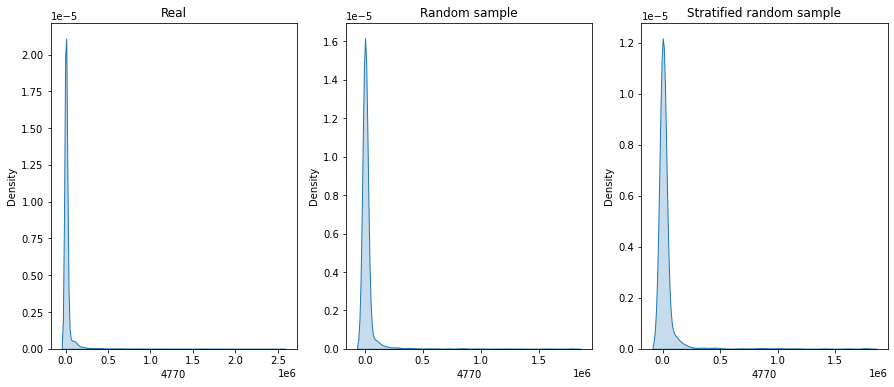

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.kdeplot(ax=axes[0], data=df, x='4770', shade=True)

# Random sample
sample_data = df.sample(frac=.15)
sns.kdeplot(ax=axes[1], data=sample_data, x='4770', shade=True)

# Stratified random sample
sample_data = df.sample(n=1500, axis=0)
sns.kdeplot(ax=axes[2], data=sample_data, x='4770', shade=True)

axes[0].set_title('Real')
axes[1].set_title('Random sample')
axes[2].set_title('Stratified random sample')
plt.show()

#Step 3

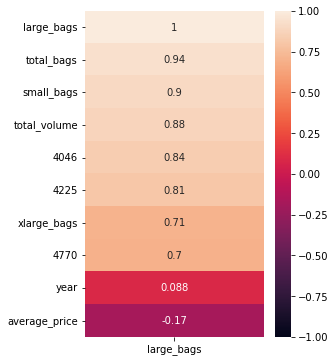

In [ ]:
plt.figure(figsize=(4, 6))
sample_cols = target + predictors
sns.heatmap(df[sample_cols].corr()[['large_bags']].sort_values(by='large_bags', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

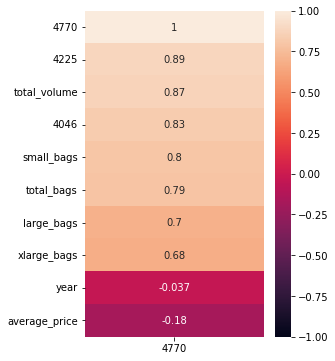

In [ ]:
plt.figure(figsize=(4, 6))
sample_cols = target + predictors
sns.heatmap(df[sample_cols].corr()[['4770']].sort_values(by='4770', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

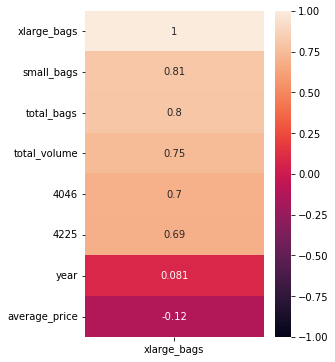

In [ ]:
plt.figure(figsize=(4, 6))
sample_cols = [target[1]] + predictors
sns.heatmap(df[sample_cols].corr()[['xlarge_bags']].sort_values(by='xlarge_bags', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

#Step 4

In [57]:
nodes_type = get_nodes_type(df)
nodes_sign = get_nodes_sign(df)

discrete_data, coder = discretization(df, 'equal_frequency', subsample_columns)

bayes_manual = dict(
    {'V': subsample_columns,
     'E': [
 ['4046', 'large_bags'],
 ['4225', 'large_bags'],

 ['total_bags', '4770'],
['small_bags', '4770'],
['4046', '4770'],

['4225', 'xlarge_bags'],
['4046', 'xlarge_bags'],
['total_volume', 'xlarge_bags'],
     ]})

pls = parameter_learning_simple(df, nodes_type, bayes_manual)
draw_BN(bayes_manual, nodes_type, 'draw_bayes_manual')

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:239: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_discretization.py:239: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  "decreasing the number of bins." % jj


#Step 5

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  FutureWarning,


Best metric is 7.821000000000001
Generation num: 0
max_depth: 6, no improvements: 0
spent time: 0.6 min
Best metric is 7.821000000000001
Generation num: 1
max_depth: 6, no improvements: 1
spent time: 1.0 min
Best metric is 7.4187
Generation num: 2
max_depth: 6, no improvements: 0
spent time: 1.3 min
Best metric is 7.4187
Generation num: 3
max_depth: 6, no improvements: 1
Number of mutation attempts exceeded. Please check composer requirements for correctness.
spent time: 3.7 min
Best metric is 7.4187
Generation num: 4
max_depth: 6, no improvements: 2
spent time: 4.1 min
Best metric is 7.4187
Generation num: 5
max_depth: 6, no improvements: 3
Number of mutation attempts exceeded. Please check composer requirements for correctness.
Number of mutation attempts exceeded. Please check composer requirements for correctness.
Number of mutation attempts exceeded. Please check composer requirements for correctness.
spent time: 10.3 min
Best metric is 7.4187
Generation num: 6
max_depth: 6, no im

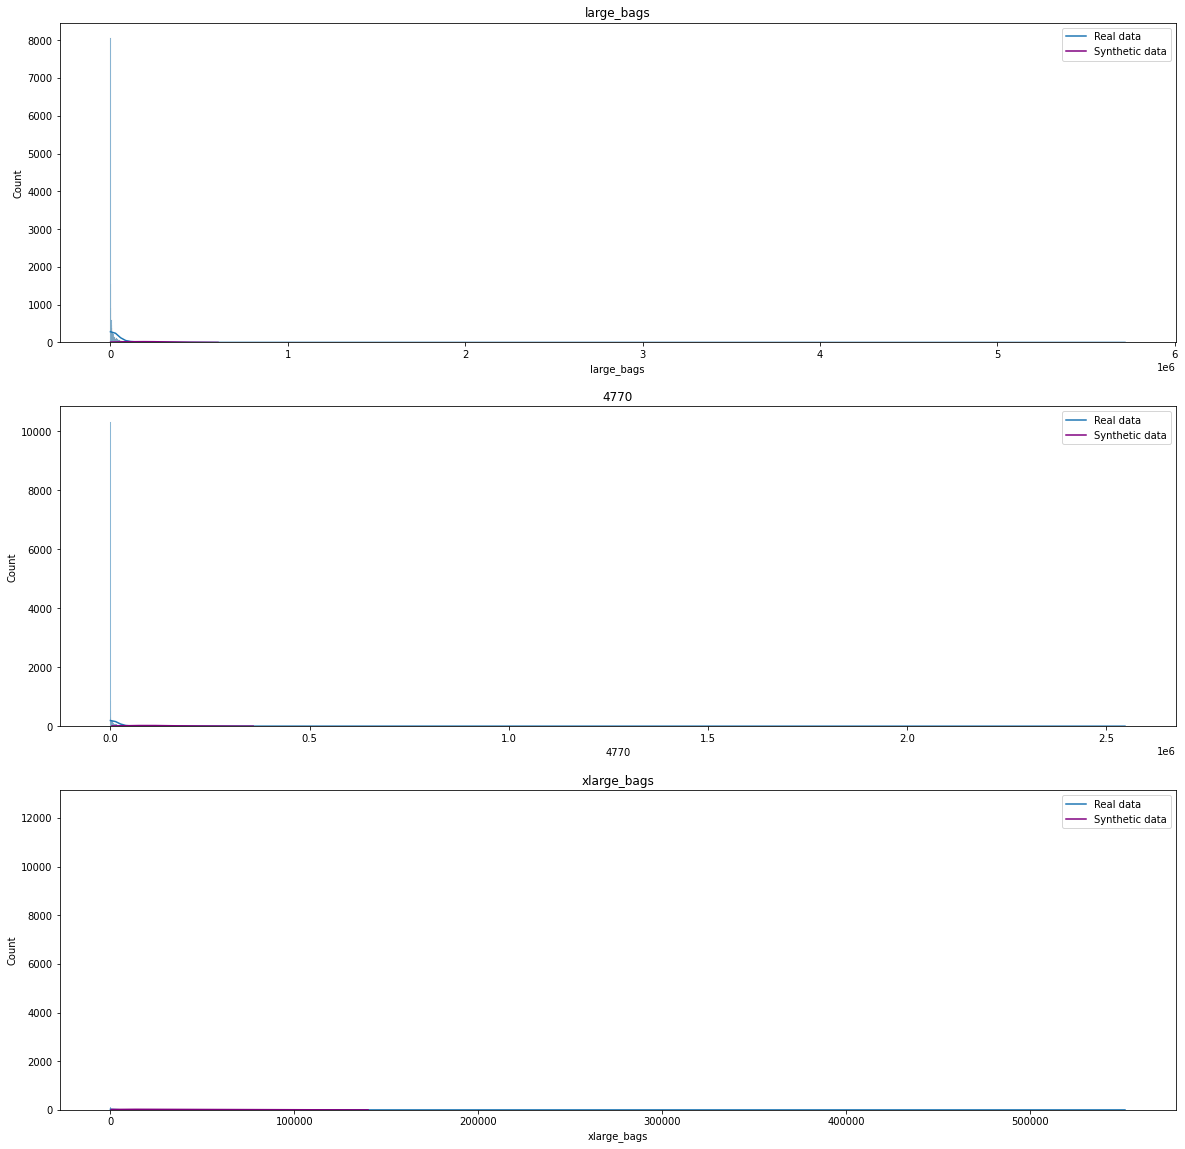

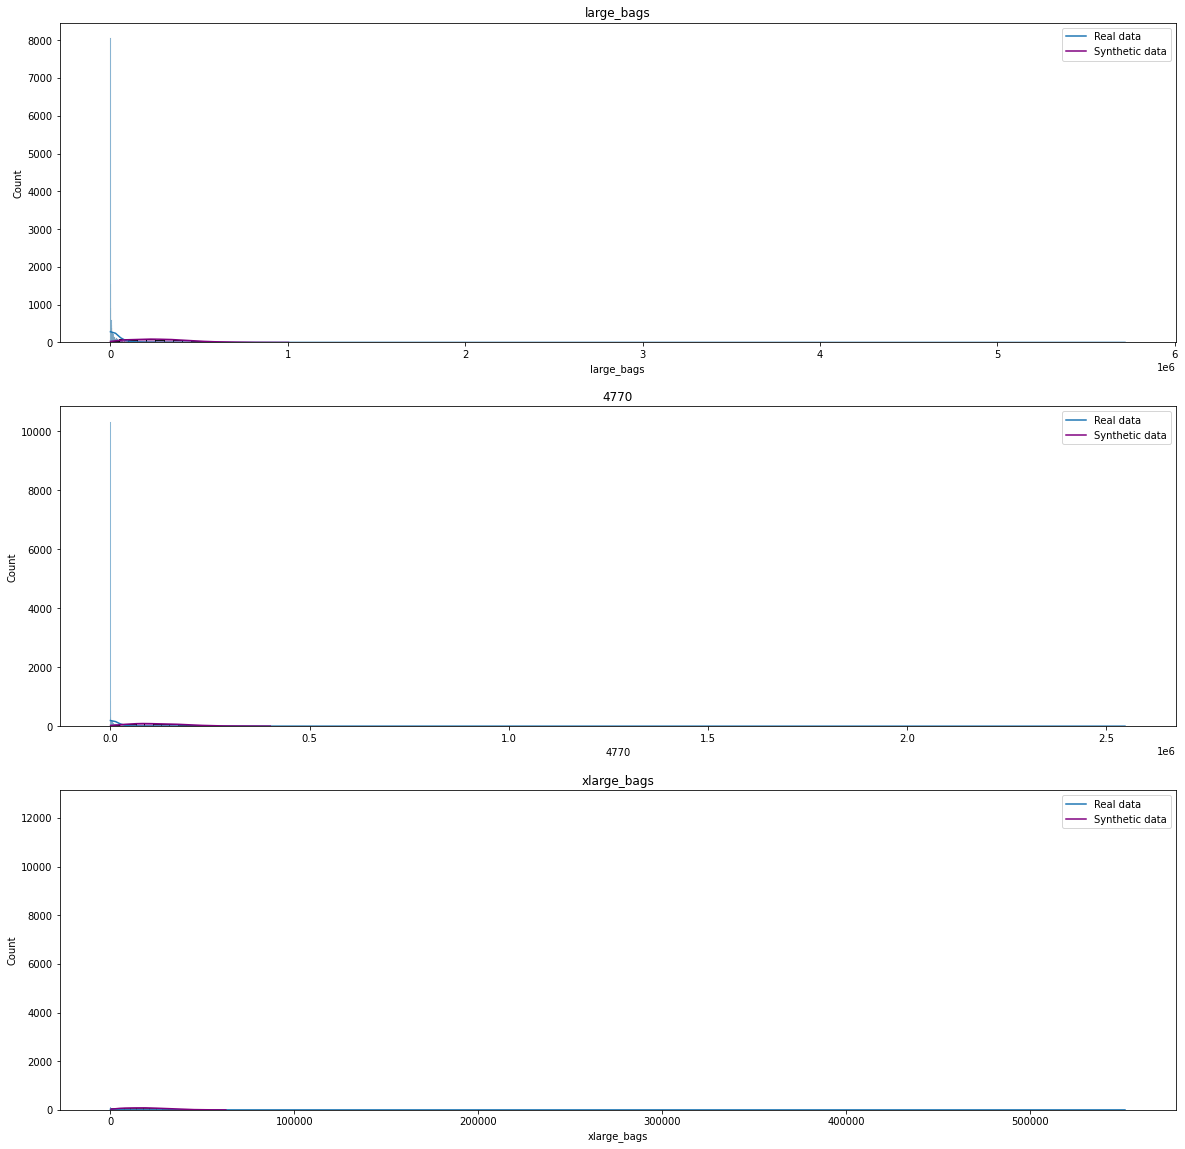

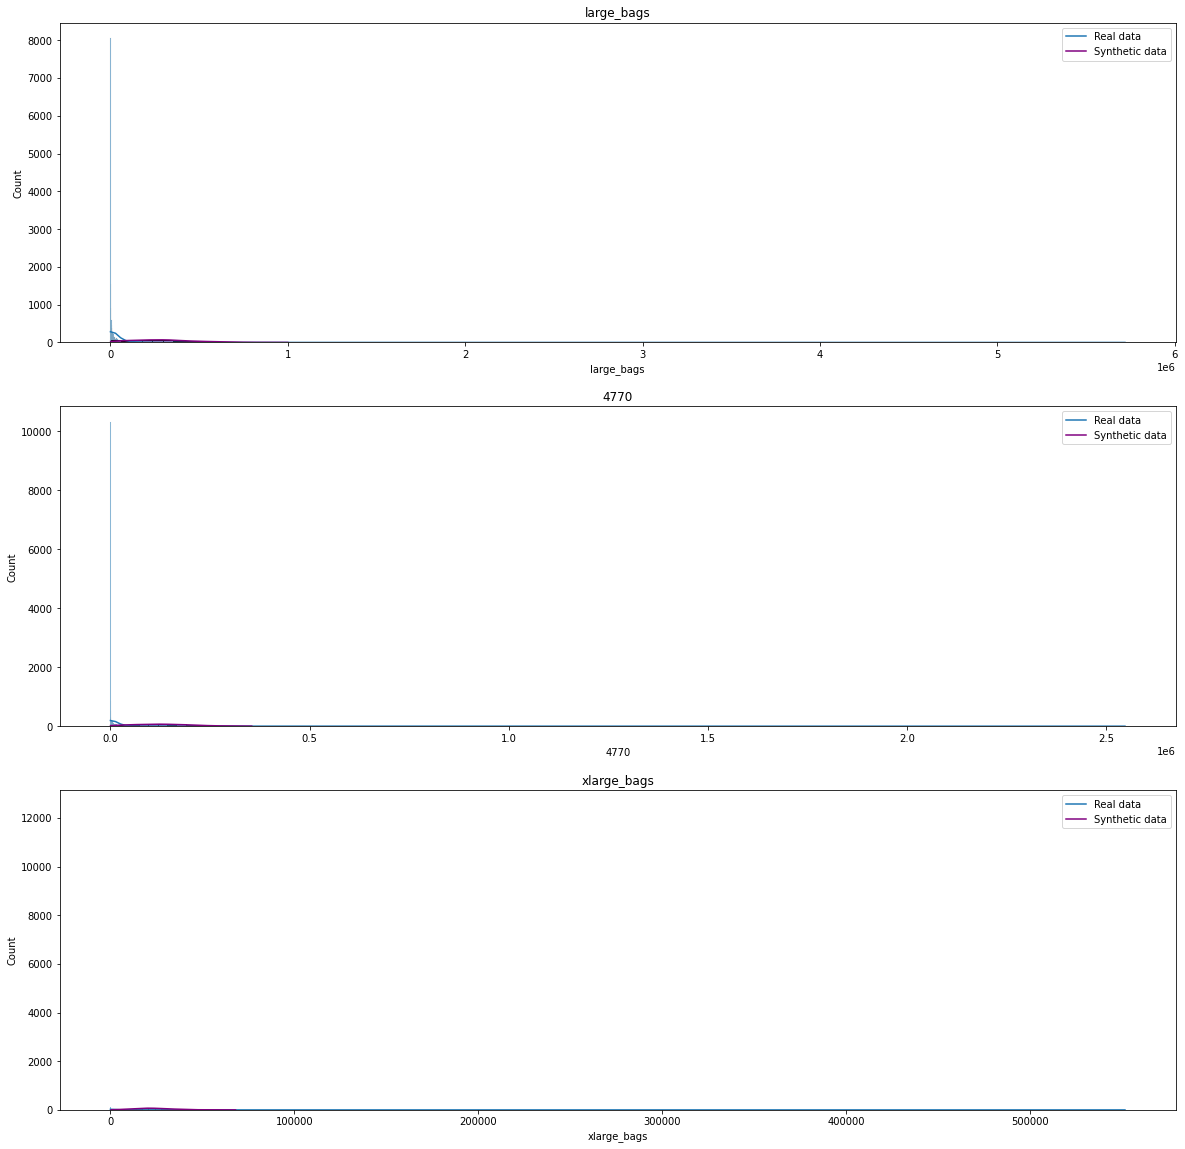

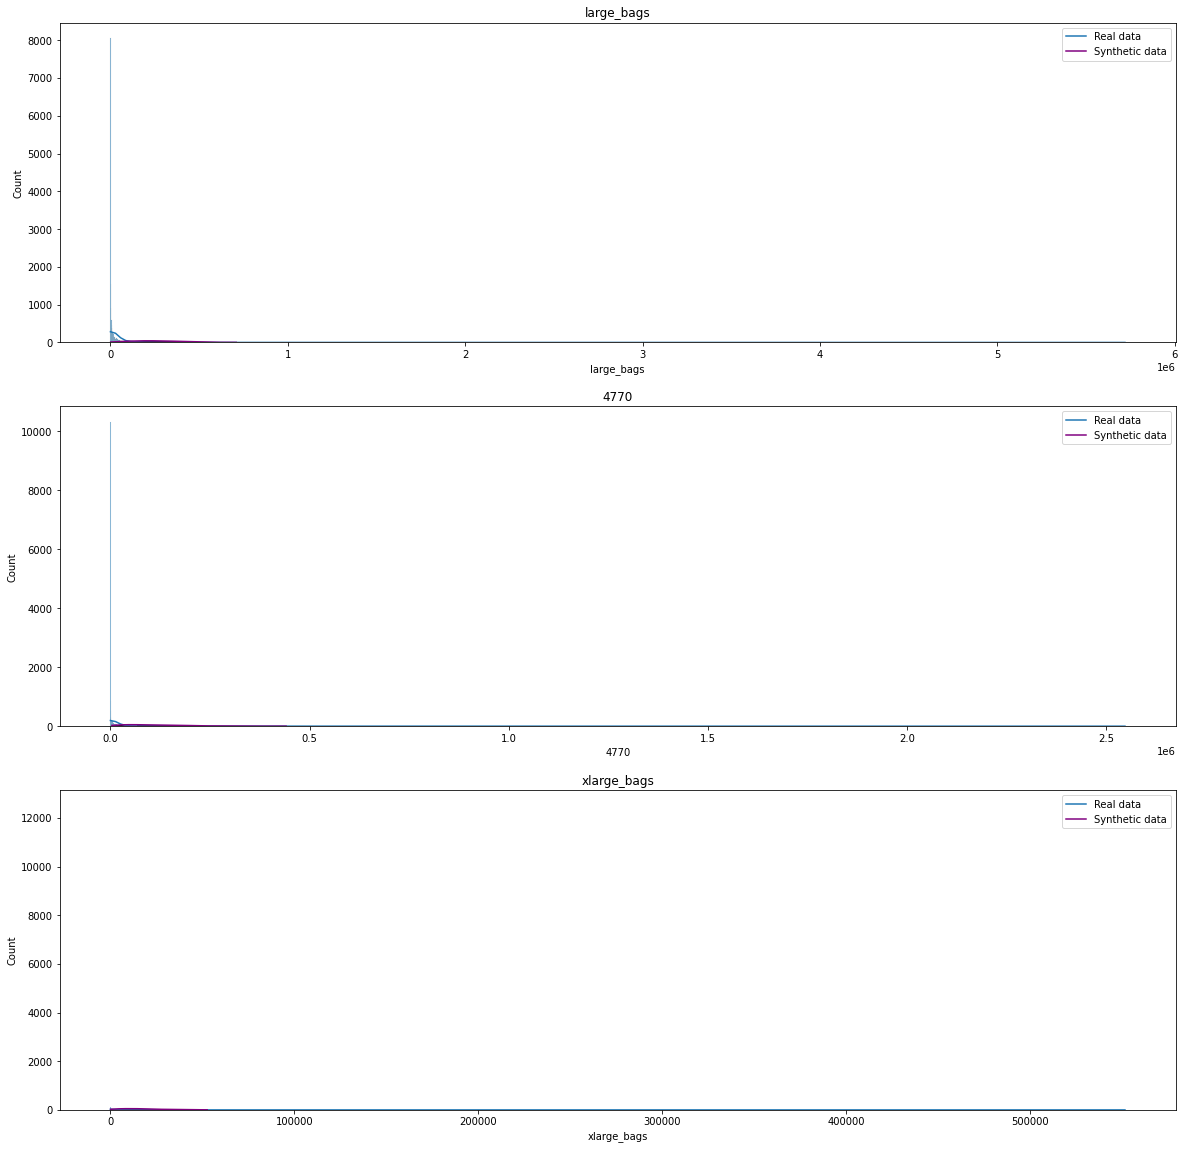

In [59]:
sl_HC_mi = structure_learning(discrete_data, 'HC', nodes_type, 'MI')
draw_BN(sl_HC_mi, nodes_type, 'MI_bn')


sl_MI_evo = structure_learning(discrete_data, 'evo', nodes_type, 'MI')
draw_BN(sl_MI_evo, nodes_type, 'mi_evo')

params_manual = parameter_learning(df, nodes_type, bayes_manual, 'simple')
save_structure(bayes_manual, 'bayes_manual')
skel = read_structure('bayes_manual')
save_params(params_manual, 'bayes_params_manual')
params_manual = read_params('bayes_params_manual')
bayes_manual = HyBayesianNetwork(skel, params_manual)

syntetic_manual = generate_synthetics(bayes_manual, nodes_sign, 'simple', 800)

fix, axs = plt.subplots(3, 1, figsize=(20, 20))
sns.histplot(df['large_bags'], ax=axs[0], kde=True)
sns.histplot(syntetic_manual['large_bags'], ax=axs[0], color='purple', kde=True)
axs[0].legend(['Real data', 'Synthetic data'])
axs[0].set_title('large_bags')

sns.histplot(df['4770'], ax=axs[1], kde=True)
sns.histplot(syntetic_manual['4770'], ax=axs[1],  color='purple', kde=True)
axs[1].legend(['Real data', 'Synthetic data'])
axs[1].set_title('4770')

sns.histplot(df['xlarge_bags'], ax=axs[2], kde=True)
sns.histplot(syntetic_manual['xlarge_bags'], ax=axs[2],  color='purple', kde=True)
axs[2].legend(['Real data', 'Synthetic data'])
axs[2].set_title('xlarge_bags')
plt.show()

params = parameter_learning(df, nodes_type, sl_HC_mi, 'simple')
save_structure(sl_HC_mi, 'bayes_hc_mi')
skel = read_structure('bayes_hc_mi')
save_params(params, 'bayes_hc_mi_params')
params = read_params('bayes_hc_mi_params')
sl_HC_mi = HyBayesianNetwork(skel, params)

syntetic_MI = generate_synthetics(sl_HC_mi, nodes_sign, 'simple', 800)


figure, axs = plt.subplots(3, 1, figsize=(20, 20))

sns.histplot(df['large_bags'], ax=axs[0], kde=True)
sns.histplot(syntetic_MI['large_bags'], ax=axs[0], color='purple', kde=True)
axs[0].legend(['Real data', 'Synthetic data'])
axs[0].set_title('large_bags')

sns.histplot(df['4770'], ax=axs[1], kde=True)
sns.histplot(syntetic_MI['4770'], ax=axs[1],  color='purple', kde=True)
axs[1].legend(['Real data', 'Synthetic data'])
axs[1].set_title('4770')

sns.histplot(df['xlarge_bags'], ax=axs[2], kde=True)
sns.histplot(syntetic_MI['xlarge_bags'], ax=axs[2],  color='purple', kde=True)
axs[2].legend(['Real data', 'Synthetic data'])
axs[2].set_title('xlarge_bags')
plt.show()

params_evo = parameter_learning(df, nodes_type, sl_MI_evo, 'simple')
save_structure(sl_MI_evo, 'bayes_evo_mi')
skel = read_structure('bayes_evo_mi')
save_params(params_evo, 'bayes_evo_mi_params')
params_evo = read_params('bayes_evo_mi_params')
sl_MI_evo = HyBayesianNetwork(skel, params_evo)

syntetic_MI_evo = generate_synthetics(sl_MI_evo, nodes_sign, 'simple', 800)


figure, axs = plt.subplots(3, 1, figsize=(20, 20))

sns.histplot(df['large_bags'], ax=axs[0], kde=True)
sns.histplot(syntetic_MI_evo['large_bags'], ax=axs[0], color='purple', kde=True)
axs[0].legend(['Real data', 'Synthetic data'])
axs[0].set_title('large_bags')

sns.histplot(df['4770'], ax=axs[1], kde=True)
sns.histplot(syntetic_MI_evo['4770'], ax=axs[1],  color='purple', kde=True)
axs[1].legend(['Real data', 'Synthetic data'])
axs[1].set_title('4770')

sns.histplot(df['xlarge_bags'], ax=axs[2], kde=True)
sns.histplot(syntetic_MI_evo['xlarge_bags'], ax=axs[2],  color='purple', kde=True)
axs[2].legend(['Real data', 'Synthetic data'])
axs[2].set_title('xlarge_bags')
plt.show()

#Step 6

In [70]:
acc_dict, rmse_dict, real_param, predicted_param, indexes = calculate_acc(bayes_manual, df.sample(frac=.10), ['large_bags', "4770", "xlarge_bags"], 'simple')
print("acc_manual")
print(acc_dict)
print("rmse_manual")
print(rmse_dict)
print("real_manual")
print(real_param)
print("predicted_manual")
print(predicted_param)

acc_dict, rmse_dict, real_param, predicted_param, indexes = calculate_acc(sl_HC_mi, df.sample(frac=.10), ['large_bags', '4770', 'xlarge_bags'], 'simple')
print("acc_HC_mi")
print(acc_dict)
print("rmse_HC_mi")
print(rmse_dict)
print("real_HC_mi")
print(real_param)
print("predicted_HC_mi")
print(predicted_param)

acc_dict, rmse_dict, real_param, predicted_param, indexes = calculate_acc(sl_MI_evo, df.sample(frac=.10), ['large_bags', '4770', 'xlarge_bags'], 'simple')
print("acc_mi_evo")
print(acc_dict)
print("rmse_mi_evo")
print(rmse_dict)
print("real_mi_evo")
print(real_param)
print("predicted_mi_evo")
print(predicted_param)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27